In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils.chaotic_images as chaotic_images
from utils.utils import normalize_outbound_to_float64


In [2]:
images = {
    'henon': chaotic_images.henon_texture(),
    'logistic': chaotic_images.logistic_texture(),
    'tent_map': chaotic_images.tent_map_texture(),
    'lozi_map': chaotic_images.lozi_map_texture(),
    'ikeda_map': chaotic_images.ikeda_map_texture(),
    'arnolds_cat_map': chaotic_images.arnolds_cat_map_texture()
}

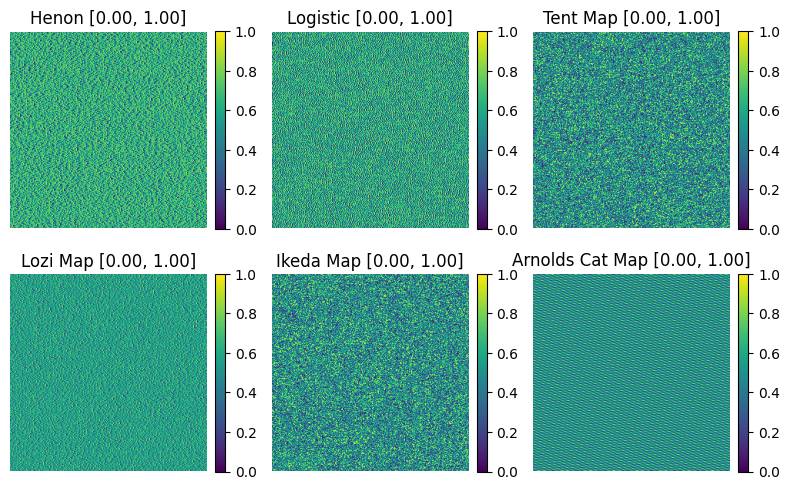

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(8,5))
axs = axs.flatten()

for i, (key, img) in enumerate(images.items()):
    im = axs[i].imshow(img, cmap='viridis')
    axs[i].set_title(f"{key.replace('_', ' ').title()} [{img.min():.2f}, {img.max():.2f}]")
    axs[i].axis('off')
    fig.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [9]:
from utils.experiments_functions import get_img_info_simple
import pandas as pd

# Initialize an empty list to store the data
image_data_list = []

# Process each image
for key, image in images.items():
    info = get_img_info_simple(image)
    info['image_name'] = key
    image_data_list.append(info)

# Create a DataFrame from the collected data
image_data_df = pd.concat(image_data_list, ignore_index=True)

image_data_df

,Smoothness,Curve structure,Entropy,Complexity,image_name
0,-0.083845,-0.089258,0.905790,0.134689,henon
1,-0.050027,-0.179577,0.866163,0.179677,logistic
2,0.000415,0.002353,0.999965,0.000046,tent_map
3,-0.087982,-0.143714,0.905007,0.130423,lozi_map
4,0.002368,0.002491,0.999946,0.000071,ikeda_map
5,0.060408,0.372503,0.828614,0.179859,arnolds_cat_map


c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


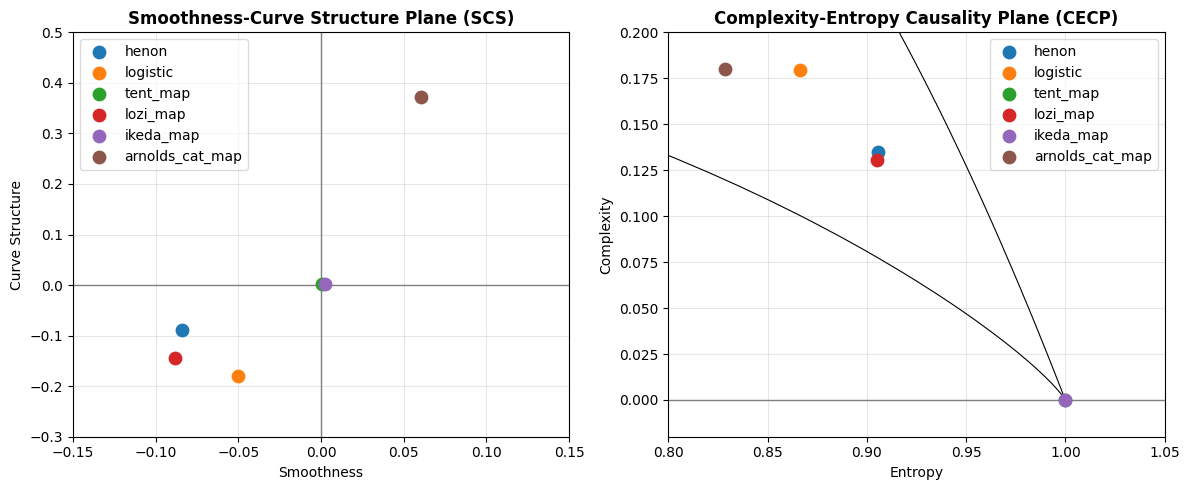

In [10]:
import matplotlib.pyplot as plt
from utils.utils import read_entropy_complexity_limits

# Define colors for each image
image_colors = {
    'henon': '#1f77b4',            # blue
    'logistic': '#ff7f0e',         # orange
    'tent_map': '#2ca02c',         # green
    'lozi_map': '#d62728',         # red
    'ikeda_map': '#9467bd',        # purple
    'arnolds_cat_map': '#8c564b'   # brown
}

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Load CECP limits for the complexity-entropy plot
df_cont, df_troz = read_entropy_complexity_limits('data/limits/mv/', N=240)

# Plot 1: SCS plane (Smoothness vs Curve Structure)
ax_scs = axes[0]
ax_scs.set_title('Smoothness-Curve Structure Plane (SCS)', fontweight='bold')
ax_scs.set_xlabel('Smoothness')
ax_scs.set_ylabel('Curve Structure')

# Plot 2: CECP plane (Entropy vs Complexity)
ax_cecp = axes[1]
ax_cecp.set_title('Complexity-Entropy Causality Plane (CECP)', fontweight='bold')
ax_cecp.set_xlabel('Entropy')
ax_cecp.set_ylabel('Complexity')

# Add CECP superior and inferior limits to the CECP plot
ax_cecp.plot(df_cont['HT'], df_cont['CJT'], color='black', linewidth=0.8)
ax_cecp.plot(df_troz['HT'], df_troz['CJT'], color='black', linewidth=0.8)

# Plot the data points for each image
for _, row in image_data_df.iterrows():
    image_name = row['image_name']
    color = image_colors[image_name]
    
    # Plot on SCS plane
    ax_scs.scatter(row['Smoothness'], row['Curve structure'], 
                  color=color, s=80, label=image_name, zorder=10)
    
    # Plot on CECP plane
    ax_cecp.scatter(row['Entropy'], row['Complexity'], 
                   color=color, s=80, label=image_name, zorder=10)

# Set reasonable axis limits with some buffer
ax_scs.set_xlim(-0.15, 0.15)
ax_scs.set_ylim(-0.3, 0.5)
ax_cecp.set_xlim(0.8, 1.05)
ax_cecp.set_ylim(-0.02, 0.2)

# Add grid and reference lines to both plots
for ax in axes:
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, lw=1, color='gray')
    ax.axvline(x=0, lw=1, color='gray')
    ax.set_aspect('auto')
    ax.legend(loc='best', framealpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.savefig('results/chaotic_maps_analysis.png', bbox_inches='tight', dpi=300)
plt.show()
